# Missing Data Imputation

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

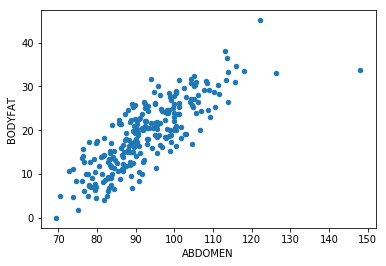

In [2]:
full_data = pd.read_csv('BodyFat.csv')
full_data.head(10)
full_data.plot.scatter(x='ABDOMEN' , y='BODYFAT')

In [3]:
full_data.head(20)


,IDNO,ABDOMEN,BODYFAT
0,1,85.2,12.6
1,2,83.0,6.9
2,3,87.9,24.6
3,4,86.4,10.9
4,5,100.0,27.8
5,6,94.4,20.6
6,7,90.7,19.0
7,8,88.5,12.8
8,9,82.5,5.1
9,10,88.6,12.0


In [4]:
#full_data.plot.scatter(x='AMZN' , y='KO')

Create a boolean array called 'mask', with same length as the data set, whose value is true for any data item in which BODYFAT exceeds some value

In [5]:
#create a copy of the full_data array called available_data, from which values will become 'missing'
available_data = full_data.copy(deep=True)

#Create a boolean array called 'mask', with same length as the data set
rand = 10*(np.random.rand(len(full_data))-0.5)
mask = (available_data.BODYFAT + rand)> 20
#print (mask)
print ('Percentage of x missing = ', round((100*(sum(mask)/len(full_data)))), '%')
available_data.loc[mask, 'ABDOMEN'] = np.nan
filled_data = available_data.copy(deep=True)

Percentage of x missing =  44 %


In [6]:
available_data.head(20)

,IDNO,ABDOMEN,BODYFAT
0,1,85.2,12.6
1,2,83.0,6.9
2,3,NaN,24.6
3,4,86.4,10.9
4,5,NaN,27.8
5,6,NaN,20.6
6,7,NaN,19.0
7,8,88.5,12.8
8,9,82.5,5.1
9,10,88.6,12.0


length of Full Data =  252


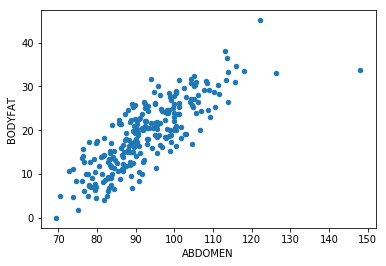

In [7]:
full_data.plot.scatter(x='ABDOMEN' , y='BODYFAT')
print ('length of Full Data = ', len(full_data))

length of Available Data =  140


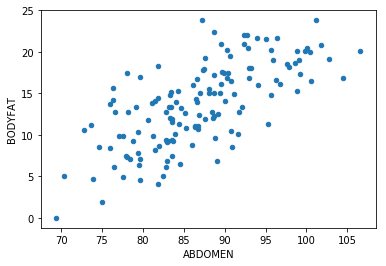

In [8]:
available_data.plot.scatter(x='ABDOMEN' , y='BODYFAT')
available_data.dropna(axis=0, inplace=True)
print ('length of Available Data = ', len(available_data))

252


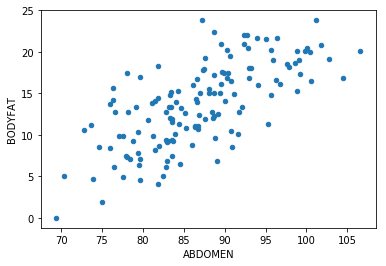

In [9]:
fig_size = plt.rcParams["figure.figsize"]
#print (fig_size)
filled_data.head(20)
filled_data.plot.scatter(x='ABDOMEN' , y='BODYFAT')
print (len(filled_data))

In [10]:
#replace missing values in filled_data using normally distributed random values with same mean and std.dev as the ABDOMEN measurements


mean = (available_data['ABDOMEN'].mean())
std = (available_data['ABDOMEN'].std())

def fill_missing_from_Gaussian(column_val):
    if np.isnan(column_val) == True: 
        column_val = np.random.normal(mean, std)
    else:
         column_val = column_val
    return column_val

filled_data['ABDOMEN'] = filled_data['ABDOMEN'].apply(fill_missing_from_Gaussian) 
filled_data.head(20)

#filled_data['ABDOMEN'].fillna(value = random.normal(mean, std))

,IDNO,ABDOMEN,BODYFAT
0,1,85.200000,12.6
1,2,83.000000,6.9
2,3,88.902256,24.6
3,4,86.400000,10.9
4,5,77.297827,27.8
5,6,108.585329,20.6
6,7,90.278743,19.0
7,8,88.500000,12.8
8,9,82.500000,5.1
9,10,88.600000,12.0


b =  -35.19660770273942
m =  0.5848905270124178
r0-squared = 0.6621178151401869
b1 =  72.45852876577179
m1 =  1.0602339836264163
r1-squared = 0.48503413681865615
b2 =  -26.137318753094824
m2 =  0.45747839091107895
r2-squared = 0.48503413681865615
b3 =  -3.6378614712937036
m3 =  0.2582402974776451
r3-squared = 0.07342505853251896


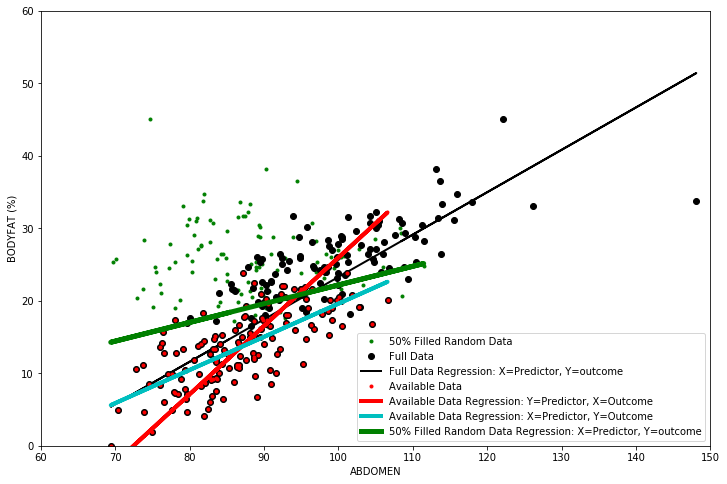

Regression line of X on Y with Full Data =  0.5849 x + -35.1966
	r-squared = 0.662
Regression line of Y on X with Available Data =  0.9432 x + -68.342
	r-squared = 0.485
Regression line of X on Y with Available Data =  0.4575 x + -26.1373
	r-squared = 0.485
Regression line of X on Y with Filled Random Data =  0.2582 x + -3.6379
	r-squared = 0.073


In [17]:
x_full = full_data['ABDOMEN']
y_full = full_data['BODYFAT']

x_available = available_data['ABDOMEN']
y_available = available_data['BODYFAT']

x_filled = filled_data['ABDOMEN']
y_filled = filled_data['BODYFAT']

plt.plot(x_filled, y_filled, 'g.', label="50% Filled Random Data")

#filled data scatter points

# print (x_full)
# print (y_full)

#Full data set scatter plot
fig_size[0] = 12
fig_size[1] = 8
plt.plot(x_full, y_full, 'ko', label="Full Data") 

#Full data set regression line
m0, b0, r0, p0, s0 = stats.linregress(x_full, y_full)
#print ('p vector = ', p)
#print ('S vector = ', S)
#b0, m0 = polyfit(x_full, y_full, 1) 
print ('b = ', b0)
print ('m = ', m0)
print ('r0-squared =', r0**2)
plt.plot(x_full, b0 + m0 * x_full, 'k-',  linewidth=2, label="Full Data Regression: X=Predictor, Y=outcome")


#Missing data set regression line
m1, b1, r1, p1, s1 = stats.linregress(y_available, x_available)
print ('b1 = ', b1)
print ('m1 = ', m1)
print ('r1-squared =', r1**2)
plt.plot(x_available, y_available, 'r.', label="Available Data")
plt.plot(x_available, x_available/m1 - b1/m1, 'r-',  linewidth=4, label="Available Data Regression: Y=Predictor, X=Outcome")


#Missing data set regression line
m2, b2, r2, p2, s2 = stats.linregress(x_available, y_available)
print ('b2 = ', b2)
print ('m2 = ', m2)
print ('r2-squared =', r2**2)
plt.plot(x_available, b2 + m2 * x_available, 'c-',  linewidth=4, label="Available Data Regression: X=Predictor, Y=Outcome")


#Plot formatting
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.xlim (60, 150)
plt.ylim (0,60)

plt.xlabel('ABDOMEN')
plt.ylabel('BODYFAT (%)', multialignment='center')

#filled missing data  line

m3, b3, r3, p3, s3 = stats.linregress(x_filled, y_filled)
print ('b3 = ', b3)
print ('m3 = ', m3)
print ('r3-squared =', r3**2)
plt.plot(x_filled, b3 + m3 * x_filled, 'g-',  linewidth=5, label="50% Filled Random Data Regression: X=Predictor, Y=outcome")

plt.legend()

plt.show()
print ('Regression line of X on Y with Full Data = ', round(m0,4), 'x', '+', round(b0,4))
print ('\tr-squared =', round(r0**2, 3))
print ('Regression line of Y on X with Available Data = ', round(1/m1,4), 'x', '+', round(-b1/m1,4))
print ('\tr-squared =', round(r1**2,3))
print ('Regression line of X on Y with Available Data = ', round(m2,4), 'x', '+', round(b2,4))
print ('\tr-squared =', round(r2**2,3))
print ('Regression line of X on Y with Filled Random Data = ', round(m3,4), 'x', '+', round(b3,4))
print ('\tr-squared =', round(r3**2,3))
 

